# Samples

In [ ]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [ ]:
# Read in the LAX temperature data
temperature_df = pd.read_csv('../Resources/lax_temperature.csv')
temperatures = temperature_df['HourlyDryBulbTemperature']
temperatures

In [ ]:
# Demonstrate calculating measures of central tendency
mean_numpy = np.mean(temperatures)
print(f"The mean temperature at the LAX airport is {mean_numpy}")

median_numpy = np.median(temperatures)
print(f"The median temperature at the LAX airport is {median_numpy}")

mode_scipy = sts.mode(temperatures)
print(f"The mode temperature at the LAX airport is {mode_scipy}")

In [ ]:
# Characterize the data set using matplotlib and stats.normaltest
plt.hist(temperatures, bins=40)
plt.xlabel('Temperature (°F)')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(temperatures.sample(50)))

In [ ]:
# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(temperatures,ddof = 0)
print(f"The population variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(temperatures,ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

In [ ]:
# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)}")

In [ ]:
# Demonstrate calculating the z-scores using SciPy
z_scipy = sts.zscore(temperatures)
print(f"The z-scores using the SciPy module are {z_scipy}")

# Summary Stats

In [ ]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts

In [ ]:
# Read in the california housing data set
california_data = pd.read_csv('../Resources/California_Housing.csv')
california_data.head()

In [ ]:
# Determine which measure of central tendency is most appropriate to describe the Population
plt.hist(california_data['Population'])
plt.xlabel('Population')
plt.ylabel('Counts')
plt.show()
print(california_data['Population'].mean())
print(california_data['Population'].median())
print(california_data['Population'].mode())

In [ ]:
# Determine if the house age in California is normally distributed
plt.hist(california_data['HouseAge'])
plt.xlabel('House Age (years)')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(california_data["HouseAge"].sample(100)))

In [ ]:
# Determine if there are any potential outliers in the average occupancy in California
quartiles = california_data['AveOccup'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_occupancy = california_data.loc[(california_data['AveOccup'] < lower_bound) | (california_data['AveOccup'] > upper_bound)]
outlier_occupancy

In [ ]:
# With the potential outliers, what is the lowest and highest median income (in $1000s) observed?
print(f"The minimum median income of the potential outliers is {outlier_occupancy['MedInc'].min()}")
print(f"The maximum median income of the potential outliers is {outlier_occupancy['MedInc'].max()}")

In [ ]:
# Bonus - plot the latitude and longitude of the California housing data using Matplotlib, color the data points using the median income of the block.
plt.scatter(california_data['Longitude'],california_data['Latitude'],c=california_data['MedInc'])
clb = plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb.set_label("Median Income")
plt.show()

# Correlations

In [ ]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [ ]:
# Import the WHO dataset, drop missing data
who_data = pd.read_csv('../Resources/WHO_data.csv')
who_data = who_data.dropna()
who_data.head()

In [ ]:
# For the first example, determine which pairs of factors are correlated. 
plt.scatter(who_data.iloc[:,1],who_data.iloc[:,8])
plt.xlabel('Income Per Capita')
plt.ylabel('Average Alcohol Consumed Per Person Per Year (L)')
plt.show()

In [ ]:
plt.scatter(who_data.iloc[:,3],who_data.iloc[:,10])
plt.xlabel('Population Median Age')
plt.ylabel('Cell Phones Per 100 People')
plt.show()

In [ ]:
plt.scatter(who_data.iloc[:,5],who_data.iloc[:,7])
plt.xlabel('% Government Expenditure on Health')
plt.ylabel('Male Life Expectancy')
plt.show()

In [ ]:
plt.scatter(who_data.iloc[:,1],who_data.iloc[:,12])
plt.xlabel('Income Per Capita')
plt.ylabel('% Measles Immunization')
plt.show()

In [ ]:
# The next example will compute the Pearson correlation coefficient between "Income per Capita" and "Average Alcohol Consumed"
income = who_data.iloc[:,1]
alcohol = who_data.iloc[:,8]
correlation = st.pearsonr(income,alcohol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [ ]:
# Compare the calcualted Pearson's r to the plots
plt.scatter(income,alcohol)
plt.xlabel('Income Per Capita')
plt.ylabel('Average Alcohol Consumed Per Person Per Year (L)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [ ]:
age = who_data.iloc[:,3]
cell_phones = who_data.iloc[:,10]
correlation = st.pearsonr(age,cell_phones)
plt.scatter(age,cell_phones)
plt.xlabel('Population Median Age')
plt.ylabel('Cell Phones Per 100 People')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [ ]:
government = who_data.iloc[:,5]
life = who_data.iloc[:,7]
correlation = st.pearsonr(government,life)
plt.scatter(government,life)
plt.xlabel('% Government Expenditure on Health')
plt.ylabel('Male Life Expectancy')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [ ]:
income = who_data.iloc[:,1]
measles = who_data.iloc[:,12]
correlation = st.pearsonr(income,measles)
plt.scatter(income,measles)
plt.xlabel('Income Per Capita')
plt.ylabel('% Measles Immunization')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

# Illinois Analysis

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets

In [39]:
# SQLAlchemy
from sqlalchemy import create_engine

# Path to sqlite
database_path = "../states_HPI_disa_weather_final2.csv"

# Read database_path and store into Pandas data frame
final_data = pd.read_csv(database_path)

final_data

,State,Year,Total_Disaster,InterestRate,Unemployment Rate,HomeOwnRate,Population,MediumIncome,HPI,Average Temperature (F),Average Temperature (C)
0,CA,1996,11.0,0.078,0.073,0.550,31780829,63176,330.618545,59.42,15.00
1,CA,1997,20.0,0.076,0.064,0.557,32217708,63245,338.655091,58.92,14.58
2,CA,1998,15.0,0.069,0.059,0.560,32682794,64349,355.755536,56.67,13.50
3,CA,1999,85.0,0.074,0.052,0.557,33145121,67156,376.622500,57.75,14.25
4,CA,2000,32.0,0.081,0.049,0.571,33987977,69696,439.172182,58.58,14.42
...,...,...,...,...,...,...,...,...,...,...,...
82,CA,1995,NaN,0.079,0.079,0.554,31493525,61846,329.986000,58.67,14.58
83,CA,1994,NaN,0.084,0.086,0.555,31317179,60464,332.747455,57.75,14.00
84,CA,1993,NaN,0.073,0.095,0.560,31147208,59529,338.246727,57.50,14.00
85,CA,1992,NaN,0.084,0.093,0.553,30875920,62517,350.106852,59.08,14.67


In [40]:
#drop nan's so I can create the plots

df = final_data.dropna()
df

,State,Year,Total_Disaster,InterestRate,Unemployment Rate,HomeOwnRate,Population,MediumIncome,HPI,Average Temperature (F),Average Temperature (C)
0,CA,1996,11.0,0.078,0.073,0.550,31780829,63176,330.618545,59.42,15.00
1,CA,1997,20.0,0.076,0.064,0.557,32217708,63245,338.655091,58.92,14.58
2,CA,1998,15.0,0.069,0.059,0.560,32682794,64349,355.755536,56.67,13.50
3,CA,1999,85.0,0.074,0.052,0.557,33145121,67156,376.622500,57.75,14.25
4,CA,2000,32.0,0.081,0.049,0.571,33987977,69696,439.172182,58.58,14.42
5,CA,2001,81.0,0.070,0.054,0.582,34479458,68413,486.225714,58.75,14.58
6,CA,2002,124.0,0.065,0.067,0.577,34871843,67600,525.130526,58.58,14.50
7,CA,2003,130.0,0.058,0.068,0.589,35253159,68695,564.373621,59.33,14.83
8,CA,2004,63.0,0.058,0.062,0.597,35574576,66782,666.211724,58.58,14.58
9,CA,2005,35.0,0.059,0.054,0.597,35827943,67918,824.612931,58.25,14.50


In [41]:
#create a new IL dataset to easily reference 
IL_df = df["State"] == 'IL'

IL_filter = df[IL_df]

IL_filter

,State,Year,Total_Disaster,InterestRate,Unemployment Rate,HomeOwnRate,Population,MediumIncome,HPI,Average Temperature (F),Average Temperature (C)
44,IL,1991,36.0,0.093,0.073,0.630,11535973,31884,146.882787,53.75,12.00
45,IL,1992,23.0,0.084,0.079,0.624,11635197,31551,144.089571,52.08,11.08
46,IL,1993,12.0,0.073,0.074,0.618,11725984,32857,141.668171,50.92,10.50
47,IL,1994,17.0,0.084,0.058,0.642,11804986,35081,149.735000,52.08,11.08
48,IL,1995,58.0,0.079,0.052,0.664,11884935,38071,159.270122,51.67,10.92
49,IL,1996,71.0,0.078,0.053,0.682,11953003,39554,164.556386,50.25,10.17
50,IL,1997,35.0,0.076,0.048,0.681,12011509,41283,170.086627,51.33,10.50
51,IL,1998,105.0,0.069,0.044,0.680,12069774,43178,170.318864,55.33,12.75
52,IL,1999,76.0,0.074,0.044,0.671,12128370,46330,175.569318,53.75,11.92
53,IL,2000,58.0,0.081,0.043,0.679,12434161,46064,182.080114,52.33,11.33


# Average Temperature vs. HPI

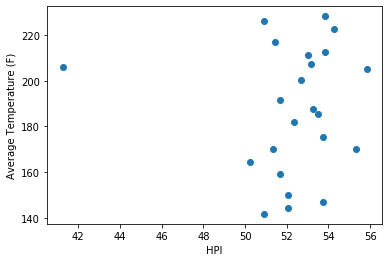

In [42]:
plt.scatter(IL_filter.iloc[:,9],IL_filter.iloc[:,8])
plt.xlabel('HPI')
plt.ylabel('Average Temperature (F)')
plt.show()

The correlation between both factors is 0.01


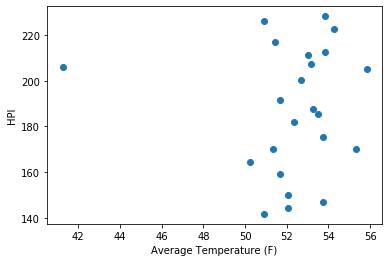

In [43]:
IL_temp = IL_filter.iloc[:,9]
IL_HPI = IL_filter.iloc[:,8]
correlation = st.pearsonr(IL_temp, IL_HPI)
plt.scatter(IL_temp, IL_HPI)
plt.xlabel('Average Temperature (F)')
plt.ylabel('HPI')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The r-squared is: 7.387944227839184e-05


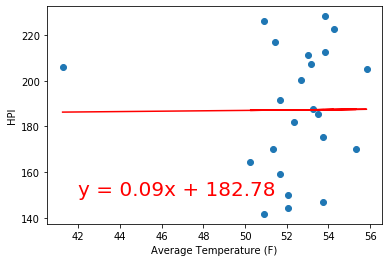

In [49]:
# Add the linear regression equation and line to plot
x_values = IL_temp
y_values = IL_HPI
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(42,150),fontsize=20,color="red")
plt.xlabel('Average Temperature (F)')
plt.ylabel('HPI')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# Average Temperature vs. Home Owner Rate

In [ ]:
# Average Temperature vs. Unemployment Rate

In [ ]:
# Average Temperature vs. Population

In [ ]:
# Average Temperature vs. Interest Rate

# Florida Analysis

# Average Temperature vs. Median Household Income, HPI, Home Owner Rate, Unemployment Rate, Population, Interest Rate Correlation

In [3]:
# Anna to add plot

# California Analysis

# Average Temperature vs. Median Household Income, HPI, Home Owner Rate, Unemployment Rate, Population, Interest Rate Correlation

In [ ]:
# Anna to add plot